In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [24]:
df = pd.read_csv('credit_risk_dataset.csv')

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [25]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


**OPIS ZBIORU DANYCH**

Jest to zbiór danych symulujący dane z biura kredytowego.
Kolejne kolumny zawierają kolejno (numeracja tak jak w zbiorze):
1. Wiek klienta

Zapisana za pomocą liczby całkowitej (integer). Najmniejsza wartość wynosi 20, a najwyższa 144. Należy wziąć to pod uwagę z dwóch powodów. Na początku należy spojrzeć na to, że trzeci kwartyl wieku wynosi 30 co oznacza, że wartość 144 będzie bardzo odstawać od reszty przypadków, co widać też na wykresie poniżej, a dodatkowo najstarsza osoba w historii zmarła w wieku 113 lat, więc każda wyższa wartość jest niezgodna z prawdą.

2. Roczny dochód klienta

Również przedstawiony w postaci liczby całkowitej. Tutaj podobnie jak w przypadku wieku klientów również znajdziemy wartości skrajne w postaci najwyższego rocznego dochodu wynoszącego 6 milionów. Patrząc na wykres możemy zauważyć, że dochód każdego z pozostałych klientów jest mniejszy niż 2 miliony, a znaczna większość (widzimy to po 3 kwartylu) ma roczny dochód nie większy od 100 tysięcy.

3. Status posiadania domu

Opisany za pomocą jednej z 4 wartości: 
* 'OWN' - klient jest w posiadaniu domu
* 'RENT' - klient wynajmuje dom
* 'MORTGAGE' - klient ma dom z hipoteką
* 'OTHER' - inny status mieszkaniowy

4. Długość zatrudnienia

Przedstawiona za pomocą liczby całkowite długość pracy klienta w latach. W tym przypadku również należy zwrócić uwagę na dwa przypadki w których długość zatrudnienia wynosi 123 lata. Co ciekawe przypadki te występują dla klientów w wieku 22 i 21 lat, co oznacza, że dane są błędne i te przypadki też należy usunąć z data setu.

5. Cel kredytu 

Opisany za pomocą jednej z 6 wartości:
* 'PERSONAL' - sprawy prywatne
* 'EDUCATION' - w celu edukacji
* 'MEDICAL' - w celach zdrowotnych
* 'VENTURE' - w celu podróży, wakacji
* 'HOMEIMPROVEMENT' - w celu remontu domu
* 'DEBTCONSOLITADION'  - w celu konsolidacji zadłużenia

6. Ocena kredytu

Opisana przy pomocy liter od 'A' (najlepsza ocena) do 'G' (najgorsza ocena). Określana jest ona na podstawie pozostałych wartości innych kolumn.

7. Wielkość kredytu

Przedstawiona za pomocą liczby całkowitej wielkość zaciągniętego kredytu przez klienta.

8. Stopa oprocentowania

Przedstawiona przy pomocy liczby zmiennoprzecinkowej (float) stopa oprocentowania.

9. Status spłaty kredytu 

Przedstawiona przy pomocy jednej z dwóch wartości: 0 lub 1. 0 oznacza wartość 'Non default' czyli brak sytuacji, w której klient zaprzestał dokonywania płatności za kredyt, natomiast 1 oznacza 'Default', czyli zatrzymanie płatności.

10. Jaką część dochodu stanowi rata kredytu

Przedstawiony w postaci liczby zmiennoprzecinkowej z zakresu 0 do 1 stosunek opłat za raty kredytu do dochodu klienta.

11. Historia spłat kredytów

Przedstawiona w postaci dwóch zmiennych 'Y' oraz 'N' informacja o tym czy w przeszłości wystąpiła sytuacja z zaprzestaniem płatności klienta rat kredytu. 'Y' oznacza 'tak', 'N' - nie.

12. Długość historii kredytowej klienta

Przedstawiony za pomocą liczby całkowitej okres (w latach) historii kredytowej klienta. 

In [26]:
df = df[(df["person_age"]<=113) & (df["person_age"] > df["person_emp_length"])]

Usunięcie z dataset'u przypadków, w których osoba ma więcej niż 113 lat (nie istniały takie osoby w historii).

[93.07053941908714, 87.54774637127578, 68.92110502737681, 69.1588785046729]
['OWN' 'MORTGAGE' 'RENT' 'OTHER']


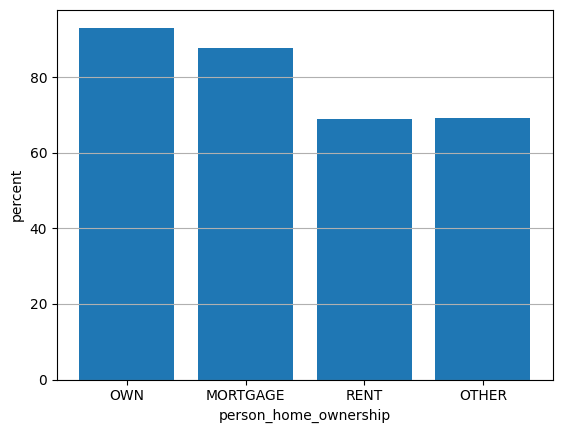

In [27]:
repayed_percent_home_ownership = []
for person_home_ownership in df['person_home_ownership'].unique():
    x = len(df[(df['loan_status'] == 0) & (df['person_home_ownership'] == person_home_ownership)]) / len(df[df['person_home_ownership'] == person_home_ownership]) * 100
    repayed_percent_home_ownership.append(x)

print(repayed_percent_home_ownership)
print(df['person_home_ownership'].unique())


plt.bar(df['person_home_ownership'].unique(), repayed_percent_home_ownership)
plt.xlabel('person_home_ownership')
plt.ylabel('percent')
plt.grid(axis='y')
plt.show()

Wykres przedstawia procentowy udizał, osób które spłaciły kredyt (LOAN_STATUS == 0) w zależności od rodzaju zamieszkania.
Jak widać kredyty były spłacane najczęściej wśród osób które posiadają nieruchomość (OWN) - 92.53%. 
Kolejno mamy osoby mieszkające w nieruchomościach zakupionych na kredyt (MORTGAGE) - 87.43%, 
osoby z grupy OTHER (np. mieszkające z rodzicami) - 69.16% oraz wynajmujące (RENT) - 68.42%.


[83.04707379134861, 73.46108190605392, 85.34125697820998, 80.51052729644121, 74.44444444444444, 71.62322274881517]
['EDUCATION' 'MEDICAL' 'VENTURE' 'PERSONAL' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']


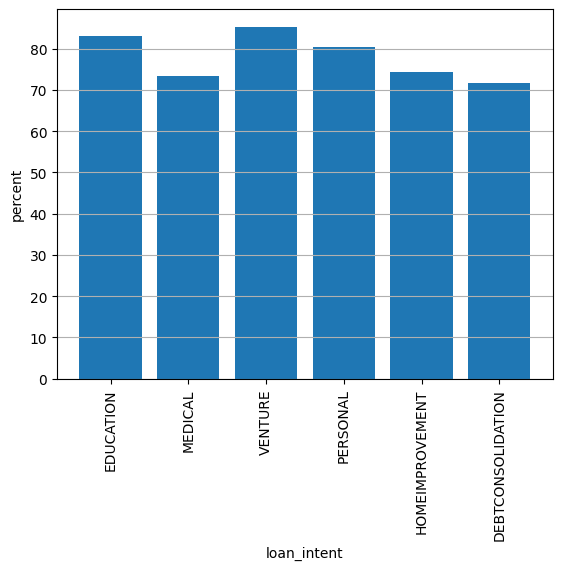

In [28]:
repayed_percent_loan_intent = []
for loan_intent in df['loan_intent'].unique():
    x = len(df[(df['loan_status'] == 0) & (df['loan_intent'] == loan_intent)]) / len(df[df['loan_intent'] == loan_intent]) * 100
    repayed_percent_loan_intent.append(x)

print(repayed_percent_loan_intent)
print(df['loan_intent'].unique())

plt.bar(df['loan_intent'].unique(), repayed_percent_loan_intent)
plt.xlabel('loan_intent')
plt.ylabel('percent')
plt.grid(axis='y')
plt.xticks(rotation='vertical')
plt.show()

Wykres przedstawia procentowy udizał, osób które spłaciły kredyt (LOAN_STATUS == 0) w zależności od celu kredytu.
Jak widać kredyty były spłacane najczęściej przez osóby które wzięły kredyty na podróże (VENTURE) - 85.18%. 
Najrzadziej zaś przez osoby konsolidujące kredyt - 71.41%.

[81.91624121914705, 62.43781094527363]
['N' 'Y']


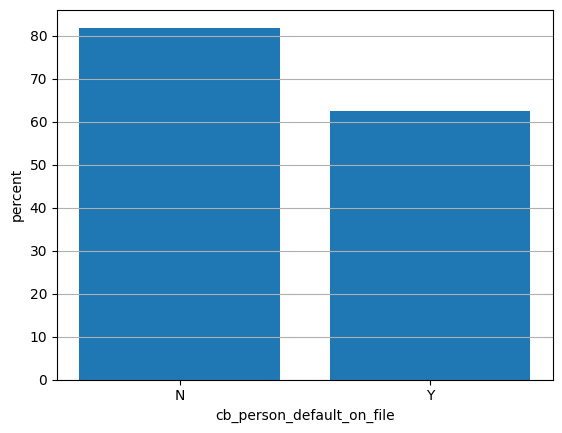

In [29]:
repayed_percent_history_default = []
for cb_person_default_on_file in df['cb_person_default_on_file'].unique():
    x = len(df[(df['loan_status'] == 0) & (df['cb_person_default_on_file'] == cb_person_default_on_file)]) / len(df[df['cb_person_default_on_file'] == cb_person_default_on_file]) * 100
    repayed_percent_history_default.append(x)

print(repayed_percent_history_default)
print(df['cb_person_default_on_file'].unique())

plt.bar(df['cb_person_default_on_file'].unique(), repayed_percent_history_default)
plt.xlabel('cb_person_default_on_file')
plt.ylabel('percent')
plt.grid(axis='y')
plt.show()

Wykres przedstawia udział osób które spłaciły kredyt w zależności od przeszłych problemów ze spłatą kredytów.

In [30]:
column_values = df['person_home_ownership'].unique()
print(column_values)

['OWN' 'MORTGAGE' 'RENT' 'OTHER']


In [31]:
column_values = df['loan_intent'].unique()
print(column_values)

['EDUCATION' 'MEDICAL' 'VENTURE' 'PERSONAL' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']


In [32]:
column_values = df['loan_grade'].unique()
print(column_values)

['B' 'C' 'A' 'D' 'E' 'F' 'G']


In [33]:
column_values = df['cb_person_default_on_file'].unique()
print(column_values)

['N' 'Y']


Zmiana wartości w kolumnach na liczbowe.

In [34]:
df = pd.get_dummies(df, prefix=['person_home_ownership'], columns=['person_home_ownership'])
df = pd.get_dummies(df, prefix=['loan_intent'], columns=['loan_intent'])
df.loan_grade = df.loan_grade.map( {'A':6 , 'B':5, 'C':4, 'D':3, 'E':2, 'F':1, 'G':0} )
df.cb_person_default_on_file = df.cb_person_default_on_file.map( {'N':0 , 'Y':1} )

In [35]:
df.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
1,21,9600,5.0,5,1000,11.14,0,0.10,0,2,0,0,1,0,0,1,0,0,0,0
2,25,9600,1.0,4,5500,12.87,1,0.57,0,3,1,0,0,0,0,0,0,1,0,0
3,23,65500,4.0,4,35000,15.23,1,0.53,0,2,0,0,0,1,0,0,0,1,0,0
4,24,54400,8.0,4,35000,14.27,1,0.55,1,4,0,0,0,1,0,0,0,1,0,0
5,21,9900,2.0,6,2500,7.14,1,0.25,0,2,0,0,1,0,0,0,0,0,0,1


In [42]:
columns = ['person_age', 'person_income', 'person_emp_length', 'loan_grade', 'loan_amnt', 'loan_int_rate',  'loan_percent_income']
sns.pairplot(df[columns], kind="scatter")
plt.show()

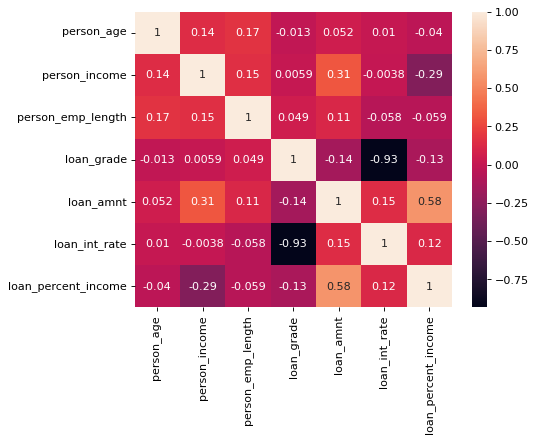

In [37]:
plt.figure(dpi = 80)
sns.heatmap(df[columns].corr(),annot = df[columns].corr())
plt.show()

In [38]:
#print(df.columns)

#print(df["loan_int_rate"].unique())
pd.set_option('display.max_rows', 20)
# print(df["loan_int_rate"])
df1 = df.isnull()
#print(df1)
for c in df1.columns:
    if True in df1[c]:
        print(c)

Sprawdzamy które kolumny zawierają braki:

In [39]:

for col in df.columns:
    if df[col].isnull().values.any():
        print(f'Kolumna {col} zawiera braki.')


Kolumna loan_int_rate zawiera braki.


In [40]:
print("Liczba braków w kolumnie person_emp_length: ",df['person_emp_length'].isnull().sum())
print("Liczba braków w kolumnie loan_int_rate: ",df['loan_int_rate'].isnull().sum())

Liczba braków w kolumnie person_emp_length:  0
Liczba braków w kolumnie loan_int_rate:  3047


Jako że danych nie jest dużo to usunięcie wierszy ograniczy nasz model, dlatego w miejsce brakujących danych wstawimy mediany wartości w danych kolumnach. Niestety umożliwi to pojawienie się błędu statystycznego, ale na szczęście wartości tych kolumn nie posiadają zbyt dużego rozrzutu. 

In [41]:
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)